# Strategy Returns Analysis

# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Import Data

In [2]:
path = "C:/Users/User/Desktop/Research Project/Top40_Investing"
os.chdir(path)

ABG = pd.read_csv("ABG_Rt_da.csv", index_col=0, parse_dates=True)
AGL = pd.read_csv("AGL_Rt_da.csv", index_col=0, parse_dates=True)
BHP = pd.read_csv("BHP_Rt_da.csv", index_col=0, parse_dates=True)
CFR = pd.read_csv("CFR_Rt_da.csv", index_col=0, parse_dates=True)
FSR = pd.read_csv("FSR_Rt_da.csv", index_col=0, parse_dates=True)
MTN = pd.read_csv("MTN_Rt_da.csv", index_col=0, parse_dates=True)
NPN = pd.read_csv("NPN_Rt_da.csv", index_col=0, parse_dates=True)
SBK = pd.read_csv("SBK_Rt_da.csv", index_col=0, parse_dates=True)
SLM = pd.read_csv("SLM_Rt_da.csv", index_col=0, parse_dates=True)
SOL = pd.read_csv("SOL_Rt_da.csv", index_col=0, parse_dates=True)


# Returns Analysis

In [3]:
prop = 0.1

ABG = ABG*prop
AGL = AGL*prop
BHP = BHP*prop
CFR = CFR*prop
FSR = FSR*prop
MTN = MTN*prop
NPN = NPN*prop
SBK = SBK*prop
SLM = SLM*prop
SOL = SOL*prop

#Strategy Returns
Strategy_Returns = (ABG['Strategy Return'] + AGL['Strategy Return'] + BHP['Strategy Return'] + CFR['Strategy Return'] 
                    + FSR['Strategy Return'] + MTN['Strategy Return'] + NPN['Strategy Return'] 
                    + SBK['Strategy Return'] + SLM['Strategy Return'] + SOL['Strategy Return'])
Strategy_Returns = pd.DataFrame(Strategy_Returns.values, columns = ['Strategy Returns'], index=Strategy_Returns.index)

#MACD Returns
MACD_Returns = (ABG['MACD Return'] + AGL['MACD Return'] + BHP['MACD Return'] + CFR['MACD Return'] 
                    + FSR['MACD Return'] + MTN['MACD Return'] + NPN['MACD Return'] 
                    + SBK['MACD Return'] + SLM['MACD Return'] + SOL['MACD Return'])
MACD_Returns = pd.DataFrame(MACD_Returns.values, columns = ['MACD Returns'], index=MACD_Returns.index)


#RSI Returns
RSI_Returns = (ABG['RSI Return'] + AGL['RSI Return'] + BHP['RSI Return'] + CFR['RSI Return'] 
                    + FSR['RSI Return'] + MTN['RSI Return'] + NPN['RSI Return'] 
                    + SBK['RSI Return'] + SLM['RSI Return'] + SOL['RSI Return'])
RSI_Returns = pd.DataFrame(RSI_Returns.values, columns = ['RSI Returns'], index=RSI_Returns.index)

#BB Returns
BB_Returns = (ABG['BB Return'] + AGL['BB Return'] + BHP['BB Return'] + CFR['BB Return'] 
                    + FSR['BB Return'] + MTN['BB Return'] + NPN['BB Return'] 
                    + SBK['BB Return'] + SLM['BB Return'] + SOL['BB Return'])

BB_Returns = pd.DataFrame(BB_Returns.values, columns = ['BB Returns'], index=BB_Returns.index)

#Buy and Hold Returns
BH_Returns = (ABG['Buy & Hold Returns'] + AGL['Buy & Hold Returns'] + BHP['Buy & Hold Returns'] + CFR['Buy & Hold Returns'] 
                    + FSR['Buy & Hold Returns'] + MTN['Buy & Hold Returns'] + NPN['Buy & Hold Returns'] 
                    + SBK['Buy & Hold Returns'] + SLM['Buy & Hold Returns'] + SOL['Buy & Hold Returns'])
BH_Returns = pd.DataFrame(BH_Returns.values, columns = ['BH Returns'], index=BH_Returns.index)

# Performance Analysis

In [4]:
dict = {'St_Rt': Strategy_Returns['Strategy Returns'], 'MACD_Rt': MACD_Returns['MACD Returns'], 
        'RSI_Rt': RSI_Returns['RSI Returns'], 'BB_Rt': BB_Returns['BB Returns'], 'BH_Rt':BH_Returns['BH Returns']}
df1 = []
df1 = pd.DataFrame(data=dict)
df1.dropna(inplace=True)

#training: 1849 and test: 610
df = df1[-610:]

#Strategy Return
Total_Strategy_Return = df['St_Rt'].sum()
Cum_Strategy_Return = df['St_Rt'].cumsum()
print('The Strategy Return is:', Total_Strategy_Return)

#MACD Return
Total_MACD_Return = df['MACD_Rt'].sum()
Cum_MACD_Return = df['MACD_Rt'].cumsum()
print('The MACD Return is:', Total_MACD_Return)

#RSI Return
Total_RSI_Return = df['RSI_Rt'].sum()
Cum_RSI_Return = df['RSI_Rt'].cumsum()
print('The RSI Return is:', Total_RSI_Return)

#BB Return
Total_BB_Return = df['BB_Rt'].sum()
Cum_BB_Return = df['BB_Rt'].cumsum()
print('The BB Return is:', Total_BB_Return)

#BH Return
Total_BH_Return = df['BH_Rt'].sum()
Cum_BH_Return = df['BH_Rt'].cumsum()
print('The Buy and Hold Return is:', Total_BH_Return)

The Strategy Return is: 0.44691933494381975
The MACD Return is: -0.10356465612172323
The RSI Return is: 0.06540144860882141
The BB Return is: 0.072632695851722
The Buy and Hold Return is: 0.2145395246664376


# Plot: Strategy Returns vs. Benchmark vs. (MACD, RSI, BB)

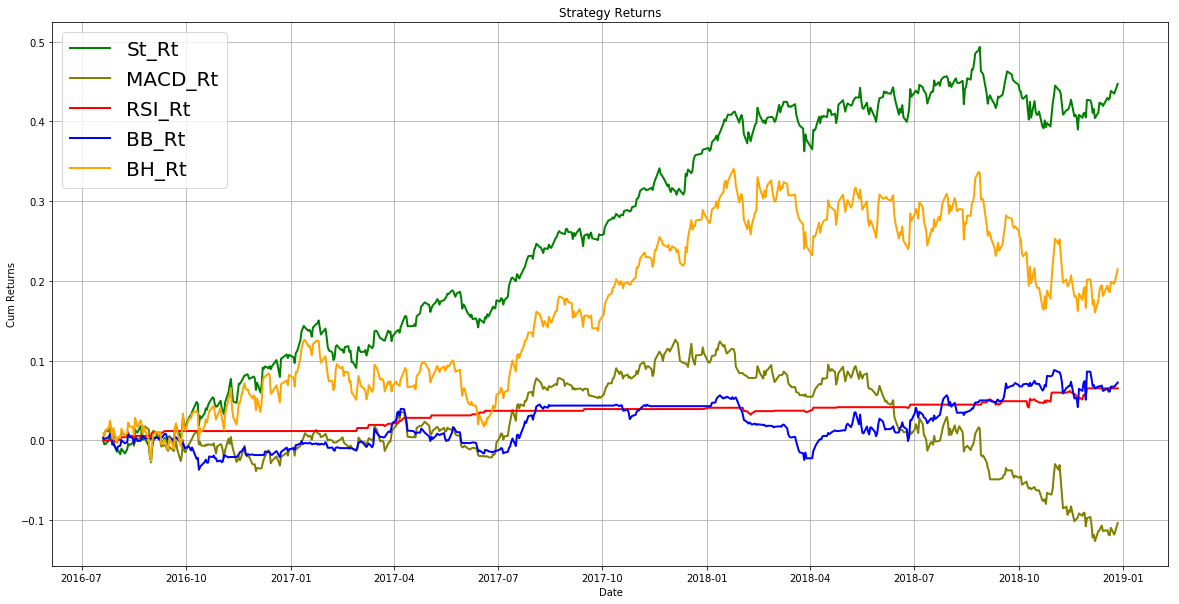

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.index, Cum_Strategy_Return, linewidth=2, color='green')
ax.plot(df.index, Cum_MACD_Return, linewidth=2, color='olive')
ax.plot(df.index, Cum_RSI_Return, linewidth=2, color='red')
ax.plot(df.index, Cum_BB_Return, linewidth=2, color='blue')
ax.plot(df.index, Cum_BH_Return, linewidth=2, color='orange')

ax.set(xlabel='Date', ylabel='Cum Returns',
       title='Strategy Returns')
ax.grid()

ax.legend(fontsize=20, loc=0)

plt.show()

# Single Stock Contribution to Portfolio Performance

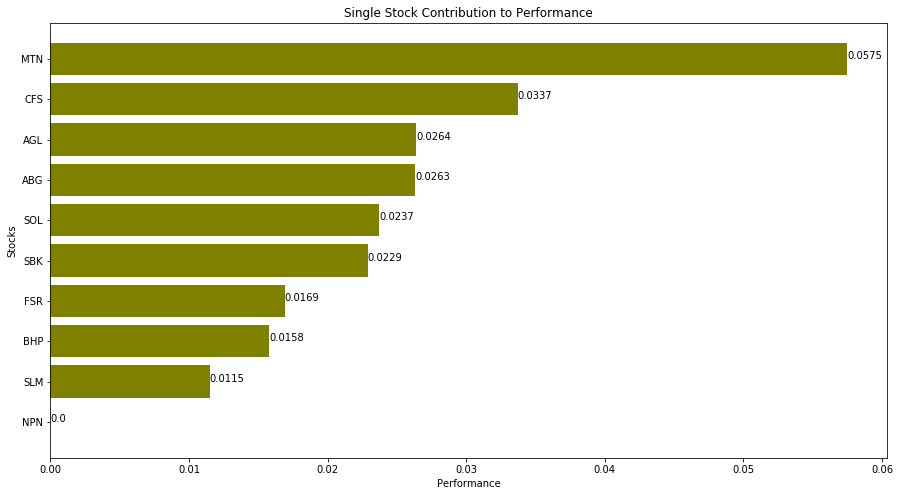

In [6]:
ABG_Op = np.round(ABG['Strategy Return'].sum() - ABG['Buy & Hold Returns'].sum(),4)
AGL_Op = np.round(AGL['Strategy Return'].sum() - AGL['Buy & Hold Returns'].sum(),4)
BHP_Op = np.round(BHP['Strategy Return'].sum() - BHP['Buy & Hold Returns'].sum(),4)
CFR_Op = np.round(CFR['Strategy Return'].sum() - CFR['Buy & Hold Returns'].sum(),4)
FSR_Op = np.round(FSR['Strategy Return'].sum() - FSR['Buy & Hold Returns'].sum(),4)
MTN_Op = np.round(MTN['Strategy Return'].sum() - MTN['Buy & Hold Returns'].sum(),4)
NPN_Op = np.round(NPN['Strategy Return'].sum() - NPN['Buy & Hold Returns'].sum(),4)
SBK_Op = np.round(SBK['Strategy Return'].sum() - SBK['Buy & Hold Returns'].sum(),4)
SLM_Op = np.round(SLM['Strategy Return'].sum() - SLM['Buy & Hold Returns'].sum(),4)
SOL_Op = np.round(SOL['Strategy Return'].sum() - SOL['Buy & Hold Returns'].sum(),4)
stocks = ['ABG', 'AGL', 'BHP', 'CFS', 'FSR', 'MTN', 'NPN', 'SBK', 'SLM', 'SOL']

Performance = [ABG_Op, AGL_Op, BHP_Op, CFR_Op, FSR_Op, MTN_Op, NPN_Op, SBK_Op, SLM_Op, SOL_Op]
dict = {'Stocks': stocks, 'Performance': Performance}
dt = []
dt = pd.DataFrame(data=dict)
dt.dropna(inplace=True)
dt = dt.sort_values(by='Performance', ascending=False)

fig, ax = plt.subplots(figsize=(15,8))

ax.barh(dt['Stocks'], dt['Performance'], align='center',
        color='olive', ecolor='black')
ax.set_yticks(dt['Stocks'])
ax.set_yticklabels(dt['Stocks'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_ylabel('Stocks')
ax.set_title('Single Stock Contribution to Performance')

for i, v in enumerate(dt['Performance']):
    ax.text(v, i, str(v), color='black', fontsize=10)

    
plt.show()